# Descente de gradient: choix de pas, démonstration interactive

***
> __Auteur__: Alexandre Gramfort, Joseph Salmon <joseph.salmon@umontpellier.fr>

We're interested in minimizing

$f(x_1, x_2) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2$

**Question** : is it a convex function?

In [1]:
import numpy as np


def f(x):
    x1, x2 = x
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
cmap_reversed = matplotlib.cm.get_cmap('RdBu_r')
from mpl_toolkits import mplot3d

In [3]:
X1, X2 = np.meshgrid(np.linspace(-5.5, 5.5, 50),
                     np.linspace(-5.5, 5.5, 50))
Z = f([X1, X2])  # Altitude

<IPython.core.display.Javascript object>


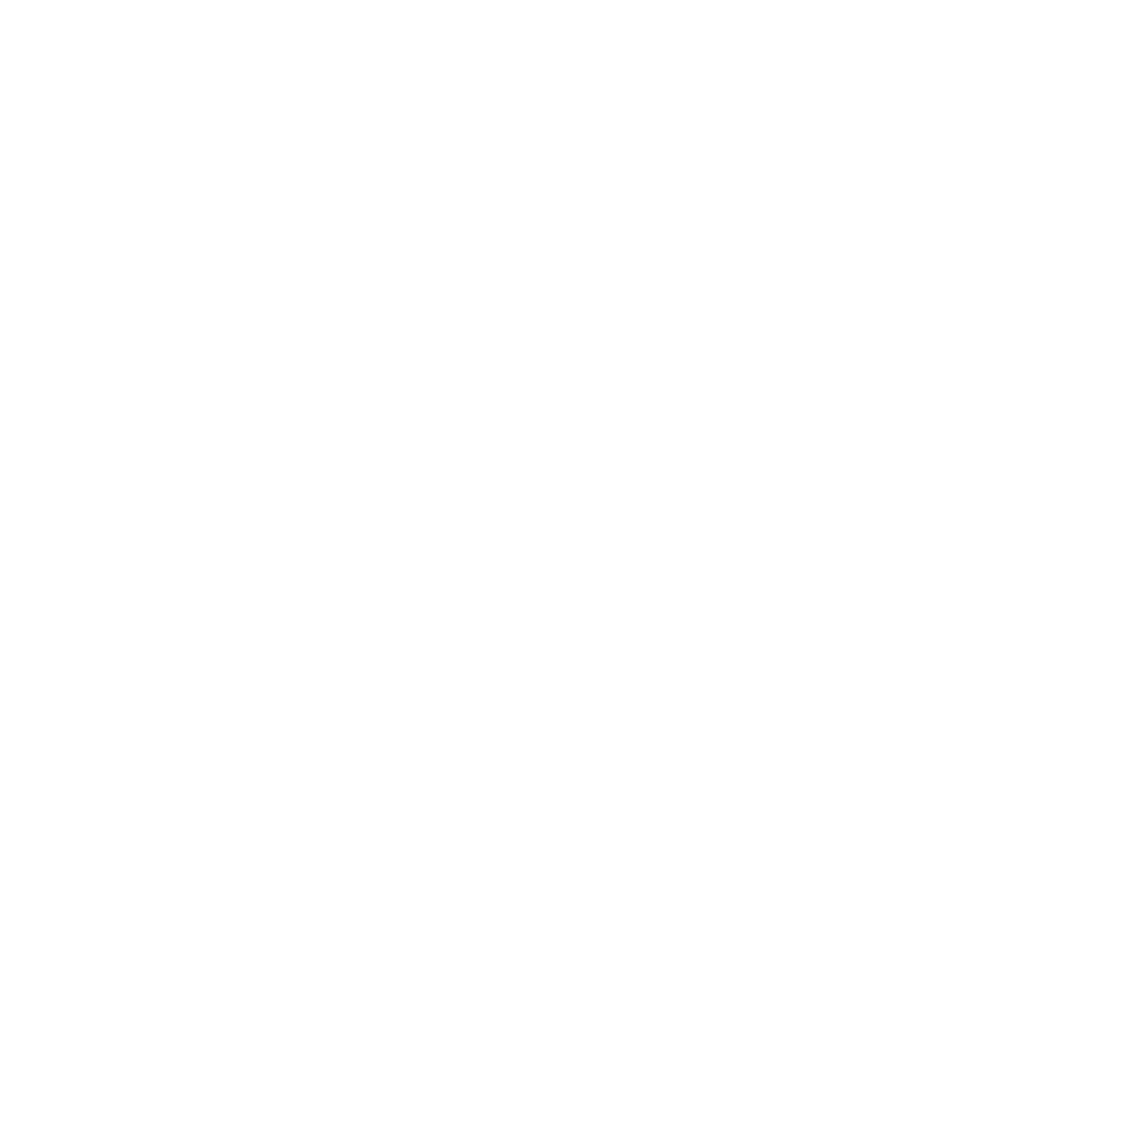

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
                cmap=cmap_reversed, edgecolor='none')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 500)
plt.show()

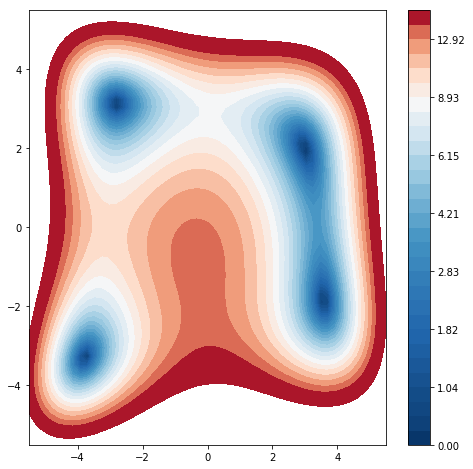

In [5]:
%matplotlib inline


def plot(xs=None):
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.figure(figsize=(8, 8))
    plt.contourf(X1, X2, np.sqrt(Z), levels=np.sqrt(
        levels), cmap=cmap_reversed)
    plt.colorbar(extend='both')
    if xs is not None:
        x1, x2 = np.array(xs).T
        plt.plot(x1, x2, 'k')
        plt.plot(x1, x2, 'o', color='purple')
    plt.show()


plot()

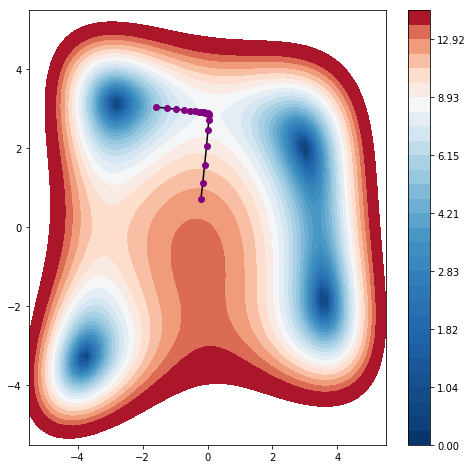

In [6]:
def f_grad(x):
    x1, x2 = x
    df_x1 = 2 * (-7 + x1 + x2**2 + 2 * x1 * (-11 + x1**2 + x2))
    df_x2 = 2 * (-11 + x1**2 + x2 + 2 * x2 * (-7 + x1 + x2**2))
    return np.array([df_x1, df_x2])


x0 = [-0.2, 0.72]


def grad_descent(step_size=0.01, max_iter=0):
    """Gradient descent with constant step size"""
    x = x0
    xs = [x]
    for k in range(max_iter):
        d_k = - f_grad(x)  # direction of descent
        t_k = step_size   # does not depend on k
        x = x + step_size * d_k
        xs.append(x)
    plot(xs)
    plt.show()


grad_descent(0.01, max_iter=20)

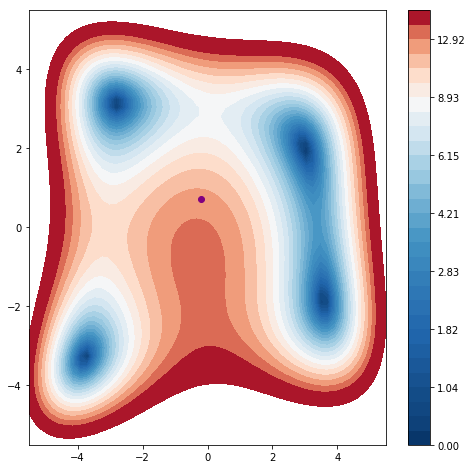

In [7]:
from ipywidgets import interact

interact(grad_descent, step_size=(0., .05, 0.005), max_iter=(0, 50, 1));

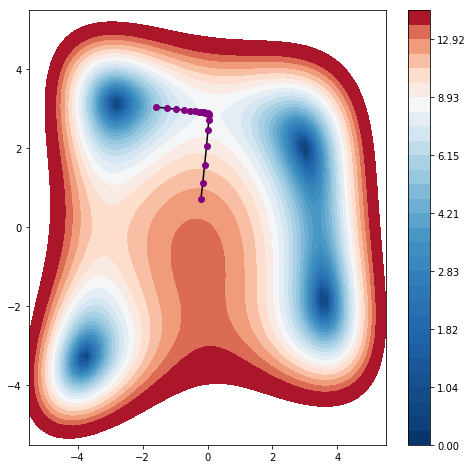

In [8]:
from scipy import optimize

def grad_descent_line_search(step_size=0.01, max_iter=2, line_search=False):
    """Gradient descent with constant step size or line search"""
    x = x0
    xs = [x]
    for k in range(max_iter):
        d_k = -f_grad(x)
        if line_search:
            c1, c2 = 0.1, 0.7
            t_k = optimize.line_search(f, f_grad, x, d_k, -d_k, c1=c1, c2=c2)[0]
        else:
            t_k = step_size
        x = x + t_k * d_k
        xs.append(x)
    plot(xs)


interact(grad_descent_line_search, step_size=(0., .05, 0.005), max_iter=(0, 50, 1));